# Analyzing Key Factors influencing U.S. Home Prices.
## About the dataset


The data collected for this assignment are sourced from fred.stlouisfed.org. These datasets contain quarterly data on key factors that influence US home prices nationally.

* DATE: The date of the observation. (2003 - 2023)
* CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted). This variable serves as a proxy for home prices    and represents the home price index for the United States
* GDP: Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Quarterly Rate).
* MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted). It indicates the average interest rate for     a 30-year fixed-rate mortgage.
* MSPUS: Median Sales Price of Houses Sold for the United States.
  
* POPTHM: Population which includes resident population plus armed forced overseas.It indicates total population of U.S over the last 20 years.

The data we have collected is recorded quarterly, which means we have observations at the end of each quarter. In our analysis, we are using the S&P Case-Shiller U.S. National Home Price Index (CSUSHPISA) as a representative measure of home prices. This index is reported quarterly and has been adjusted for seasonal variations, making it a comprehensive indicator of home prices on a national scale. These datasets contain valuable information about various significant factors and their potential impact on home prices in the United States. By analyzing this data and developing a data science model, we aim to uncover insights into the connections between these factors and changes in home prices over the last twenty years.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings   
warnings.filterwarnings('ignore')

In [2]:
gdp = pd.read_csv("D:\DS\Project\Datasets\GDP.csv")
median_ps = pd.read_csv("D:\DS\Project\Datasets\MEDIAN_PRICESOLD.csv")
mortage = pd.read_csv("D:\DS\Project\Datasets\MORTGAGE30US.csv")
pop = pd.read_csv("D:\DS\Project\Datasets\POPTHM.csv")
unemp = pd.read_csv("D:\\DS\\Project\\Datasets\\UNRATE.csv")
hprice = pd.read_csv("D:\DS\Project\Datasets\CSUSHPISA.csv")

In [3]:
gdp.head()

,DATE,GDP
0,2003-01-01,11174.129
1,2003-04-01,11312.766
2,2003-07-01,11566.669
3,2003-10-01,11772.234
4,2004-01-01,11923.447


In [4]:
median_ps.head()

,DATE,MSPUS
0,2003-01-01,186000.0
1,2003-04-01,191800.0
2,2003-07-01,191900.0
3,2003-10-01,198800.0
4,2004-01-01,212700.0


In [5]:
mortage.head()

,DATE,MORTGAGE30US
0,2003-01-01,5.8407692307692308
1,2003-04-01,5.5069230769230769
2,2003-07-01,6.0338461538461538
3,2003-10-01,5.9192857142857143
4,2004-01-01,5.5975000000000000


In [6]:
pop.head()

,DATE,POPTHM
0,2003-01-01,289609.000000000000
1,2003-04-01,290252.666666666667
2,2003-07-01,290974.000000000000
3,2003-10-01,291669.333333333333
4,2004-01-01,292236.666666666667


In [7]:
unemp.head()

,DATE,UNRATE
0,2003-01-01,5.866667
1,2003-04-01,6.133333
2,2003-07-01,6.133333
3,2003-10-01,5.833333
4,2004-01-01,5.700000


In [8]:
mdf = pd.merge(mortage,pop,how="inner",on = "DATE")

In [9]:
mdf1 = pd.merge(gdp,median_ps,how="inner",on = "DATE")
mdf1.head()

,DATE,GDP,MSPUS
0,2003-01-01,11174.129,186000.0
1,2003-04-01,11312.766,191800.0
2,2003-07-01,11566.669,191900.0
3,2003-10-01,11772.234,198800.0
4,2004-01-01,11923.447,212700.0


In [10]:
data1 = pd.merge(mdf,unemp,how="inner",on = "DATE")
data1.head()

,DATE,MORTGAGE30US,POPTHM,UNRATE
0,2003-01-01,5.8407692307692308,289609.000000000000,5.866667
1,2003-04-01,5.5069230769230769,290252.666666666667,6.133333
2,2003-07-01,6.0338461538461538,290974.000000000000,6.133333
3,2003-10-01,5.9192857142857143,291669.333333333333,5.833333
4,2004-01-01,5.5975000000000000,292236.666666666667,5.700000


In [11]:
data2 = pd.merge(data1,mdf1,how = "inner",on = "DATE")


In [12]:
data = pd.merge(data2,hprice,how = "inner",on = "DATE")
data.head()

,DATE,MORTGAGE30US,POPTHM,UNRATE,GDP,MSPUS,CSUSHPISA
0,2003-01-01,5.8407692307692308,289609.000000000000,5.866667,11174.129,186000.0,129.3213333333333333
1,2003-04-01,5.5069230769230769,290252.666666666667,6.133333,11312.766,191800.0,131.7556666666666667
2,2003-07-01,6.0338461538461538,290974.000000000000,6.133333,11566.669,191900.0,135.0133333333333333
3,2003-10-01,5.9192857142857143,291669.333333333333,5.833333,11772.234,198800.0,138.8349999999999933
4,2004-01-01,5.5975000000000000,292236.666666666667,5.700000,11923.447,212700.0,143.2990000000000067


In [13]:
data = data.rename(columns={"MORTGAGE30US":"Mortgage","POPTHM":"Population","UNRATE":"Unemployement_Rate","MSPUS":"Median_Sales_Price","CSUSHPISA":"House_Price_Index"})

In [14]:
data.head()

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
0,2003-01-01,5.8407692307692308,289609.000000000000,5.866667,11174.129,186000.0,129.3213333333333333
1,2003-04-01,5.5069230769230769,290252.666666666667,6.133333,11312.766,191800.0,131.7556666666666667
2,2003-07-01,6.0338461538461538,290974.000000000000,6.133333,11566.669,191900.0,135.0133333333333333
3,2003-10-01,5.9192857142857143,291669.333333333333,5.833333,11772.234,198800.0,138.8349999999999933
4,2004-01-01,5.5975000000000000,292236.666666666667,5.700000,11923.447,212700.0,143.2990000000000067


In [15]:
data.round({"Mortgage":3})
data.head()

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
0,2003-01-01,5.8407692307692308,289609.000000000000,5.866667,11174.129,186000.0,129.3213333333333333
1,2003-04-01,5.5069230769230769,290252.666666666667,6.133333,11312.766,191800.0,131.7556666666666667
2,2003-07-01,6.0338461538461538,290974.000000000000,6.133333,11566.669,191900.0,135.0133333333333333
3,2003-10-01,5.9192857142857143,291669.333333333333,5.833333,11772.234,198800.0,138.8349999999999933
4,2004-01-01,5.5975000000000000,292236.666666666667,5.700000,11923.447,212700.0,143.2990000000000067


In [16]:
data.head()

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
0,2003-01-01,5.8407692307692308,289609.000000000000,5.866667,11174.129,186000.0,129.3213333333333333
1,2003-04-01,5.5069230769230769,290252.666666666667,6.133333,11312.766,191800.0,131.7556666666666667
2,2003-07-01,6.0338461538461538,290974.000000000000,6.133333,11566.669,191900.0,135.0133333333333333
3,2003-10-01,5.9192857142857143,291669.333333333333,5.833333,11772.234,198800.0,138.8349999999999933
4,2004-01-01,5.5975000000000000,292236.666666666667,5.700000,11923.447,212700.0,143.2990000000000067


In [17]:
data.dtypes

DATE                   object
Mortgage               object
Population             object
Unemployement_Rate    float64
GDP                   float64
Median_Sales_Price    float64
House_Price_Index      object
dtype: object

In [18]:
data['Mortgage'] = data['Mortgage'].astype(float)
data['Population'] = data['Population'].astype(float)
data['House_Price_Index'] = data['House_Price_Index'].astype(float)
data["DATE"] = pd.to_datetime(data["DATE"])

In [19]:
data.dtypes

DATE                  datetime64[ns]
Mortgage                     float64
Population                   float64
Unemployement_Rate           float64
GDP                          float64
Median_Sales_Price           float64
House_Price_Index            float64
dtype: object

In [20]:
data.head()

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
0,2003-01-01,5.840769,289609.000000,5.866667,11174.129,186000.0,129.321333
1,2003-04-01,5.506923,290252.666667,6.133333,11312.766,191800.0,131.755667
2,2003-07-01,6.033846,290974.000000,6.133333,11566.669,191900.0,135.013333
3,2003-10-01,5.919286,291669.333333,5.833333,11772.234,198800.0,138.835000
4,2004-01-01,5.597500,292236.666667,5.700000,11923.447,212700.0,143.299000


In [21]:
data = data.round(3)

In [22]:
data = data.round({"Mortage":2,"Population":2,"Unemployement_Rate":1,"GDP":2,"Median_Sales_Price":0,"House_Price_Index":2})
data.head()

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
0,2003-01-01,5.841,289609.00,5.9,11174.13,186000.0,129.32
1,2003-04-01,5.507,290252.67,6.1,11312.77,191800.0,131.76
2,2003-07-01,6.034,290974.00,6.1,11566.67,191900.0,135.01
3,2003-10-01,5.919,291669.33,5.8,11772.23,198800.0,138.84
4,2004-01-01,5.598,292236.67,5.7,11923.45,212700.0,143.30


## Exploratory Data Analysis 
### Correlations

In order to better understand the correlation between independent variables and the target variable, which is home prices, we performed exploratory data analysis on the datasets we collected. Below, you will find the main discoveries and visual representations that highlight the patterns and connections of each variable with the U.S. National Home Price Index.

In [23]:
data.corr()

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
DATE,1.000000,-0.612552,0.993698,-0.247209,0.972733,0.898280,0.762595
Mortgage,-0.612552,1.000000,-0.658113,-0.224338,-0.448722,-0.330469,-0.092894
Population,0.993698,-0.658113,1.000000,-0.212412,0.944451,0.853128,0.694284
Unemployement_Rate,-0.247209,-0.224338,-0.212412,1.000000,-0.374106,-0.482240,-0.530796
GDP,0.972733,-0.448722,0.944451,-0.374106,1.000000,0.961185,0.878763
Median_Sales_Price,0.898280,-0.330469,0.853128,-0.482240,0.961185,1.000000,0.942874
House_Price_Index,0.762595,-0.092894,0.694284,-0.530796,0.878763,0.942874,1.000000


## Correlation Matrix: 
This shows influence of HPI with other factors (positive or negative and intensity)

<Axes: >

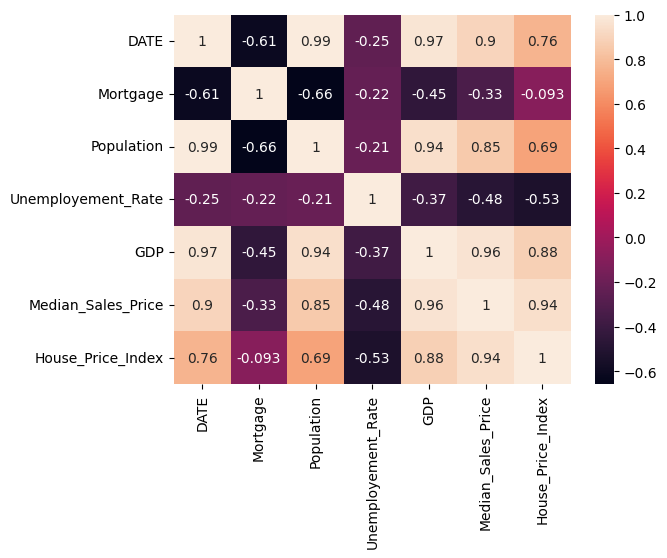

In [41]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True)

To explain the relationship between each column in the data and House_Price_Index , we will analyse the correlation coefficients provided.

### Mortgage : Negative correlation (-0.61): 
There is a weak negative relationship between mortgage interest rates and House_Price_Index. It suggests that higher mortgage rates are associated with slightly lower home prices.

### Population : Strong positive correlation (0.99): 
There is a compelling positive correlation between the population and the House Price Index. This points to a robust direct relationship, suggesting that as the population increases, there is a substantial tendency for home prices to also increase.

### Unemployement_Rate : Negative correlation (-0.24): 
There is a negative correlation between the unemployment rate and the House Price Index which suggests a mild inverse relationship, indicating that as the unemployment rate increases, there is a tendency for home prices to experience a slight decrease.

### GDP (Gross Domestic Product): Strong positive correlation (0.97): 
There is a strong positive relationship between GDP and House_Price_Index. Higher GDP is strongly associated with higher home prices.

### Median_Sales_Price: Strong positive correlation (0.89): 
There is a strong positive relationship between the median sales price of houses sold and House_Price_Index. Higher median sales prices are strongly associated with higher home prices.

These correlation coefficients provide insights into the relationships between each variable and House_Price_Index, indicating their influence on home prices.

## Visualization Analysis:

<Axes: xlabel='House_Price_Index', ylabel='GDP'>

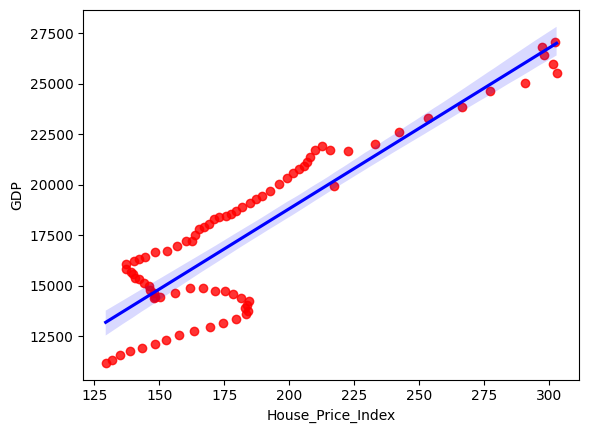

In [25]:
sns.regplot(x="House_Price_Index", y="GDP", data=data,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='House_Price_Index', ylabel='Population'>

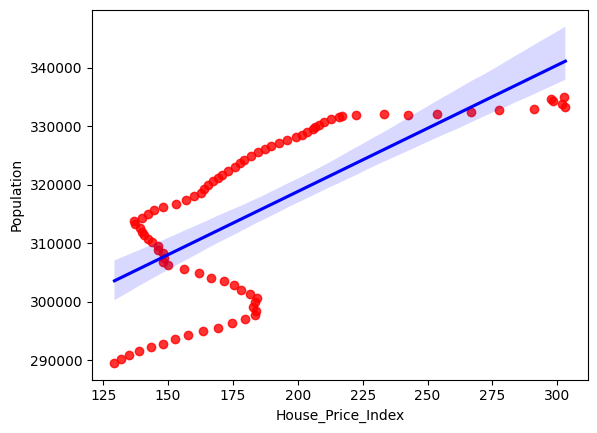

In [26]:
sns.regplot(x="House_Price_Index", y="Population", data=data,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='House_Price_Index', ylabel='Mortgage'>

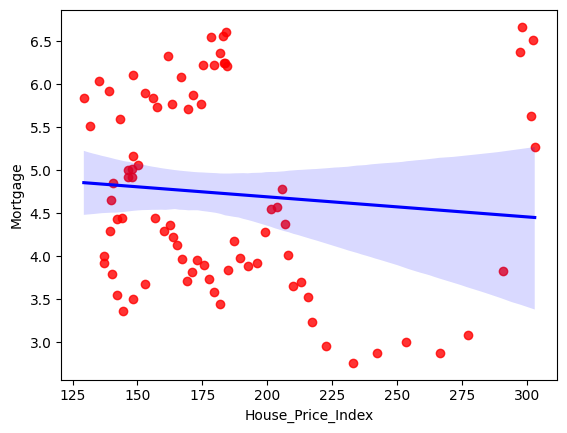

In [27]:
sns.regplot(x="House_Price_Index", y="Mortgage", data=data,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='House_Price_Index', ylabel='Unemployement_Rate'>

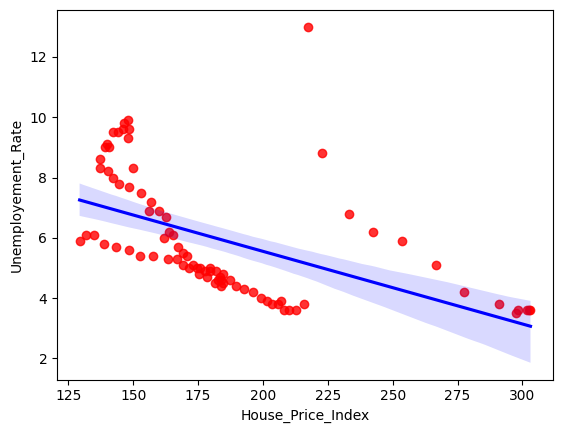

In [28]:
sns.regplot(x="House_Price_Index", y="Unemployement_Rate", data=data,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='House_Price_Index', ylabel='Median_Sales_Price'>

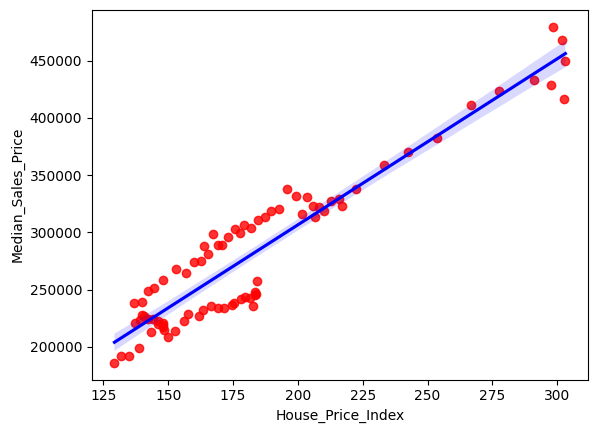

In [29]:
sns.regplot(x="House_Price_Index", y="Median_Sales_Price", data=data,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [30]:
data.shape

(82, 7)

In [31]:
data.head(3)

,DATE,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price,House_Price_Index
0,2003-01-01,5.841,289609.00,5.9,11174.13,186000.0,129.32
1,2003-04-01,5.507,290252.67,6.1,11312.77,191800.0,131.76
2,2003-07-01,6.034,290974.00,6.1,11566.67,191900.0,135.01


## Splitting the dataset

In [32]:
x = data.drop(['DATE','House_Price_Index'],axis = 'columns')
x.head(7)

,Mortgage,Population,Unemployement_Rate,GDP,Median_Sales_Price
0,5.841,289609.00,5.9,11174.13,186000.0
1,5.507,290252.67,6.1,11312.77,191800.0
2,6.034,290974.00,6.1,11566.67,191900.0
3,5.919,291669.33,5.8,11772.23,198800.0
4,5.598,292236.67,5.7,11923.45,212700.0
5,6.106,292875.33,5.6,12112.82,217600.0
6,5.894,293603.33,5.4,12305.31,213500.0


In [33]:
y = data.House_Price_Index
y.head(3)

0    129.32
1    131.76
2    135.01
Name: House_Price_Index, dtype: float64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [35]:
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.9634166699617819

## Performing and evaluating various regression models
### Hyperparameter tuning using GridSearchCV

In [36]:
best_model = None
best_score = 0

def find_best_model_using_gridsearchcv(x,y):
    global best_model 
    global best_score
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}
        },
        'lasso': {'model': Lasso(),
            'params': {'alpha': [1, 2],
                'selection': ['random', 'cyclic']}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']}
        },
        'RandomForest': {'model': RandomForestRegressor(),
            'params': {'criterion': ['squared_error', 'poisson'],
               'bootstrap':[True, False]}
        },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
      
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        best_score = max(best_score,gs.best_score_)
        if best_score == gs.best_score_:
            best_model = config['model']
            
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [37]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.942653,{'fit_intercept': True}
1,lasso,0.961777,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.980628,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,RandomForest,0.990502,"{'bootstrap': True, 'criterion': 'squared_error'}"


In [38]:
print('Model Selection Results:','\nBest_model:',best_model,'\nBest_score:',best_score)

Model Selection Results: 
Best_model: RandomForestRegressor() 
Best_score: 0.9905017898121147


### Model Evaluation:

* The code defines a function, find_best_model_using_gridsearchcv, to find the best regression model for a dataset. 
* It uses multiple regression algorithms and grid search with cross-validation to evaluate their performance.
* The best model and associated score are tracked using global variables.
* The results are summarized in a DataFrame.
* This function assists in selecting the optimal regression model for a given dataset

### Conclusion:
Based on the correlation analysis and score from the RandomForest Regression model, several key insights can be derived:
* GDP plays a crucial role in determining home prices. A strong economy with higher GDP and slightly lower interest rates tends to support higher home     prices.
* The median sales price of houses sold is strongly correlated with home prices, reflecting the importance of market dynamics and buyer behaviour in       determining home price movements.
* Mortage has a negative impact on home prices. Higher mortgage rates and lower consumer sentiment are associated with slightly lower home prices.
* Unemployement rate has a negative correlation with the House Price Index which suggests a mild inverse relationship, indicating that as the unemployment rate increases, there is a tendency for home prices to experience a slight decrease.
* These insights have broad relevance in the real estate industry, benefitting homebuyers, sellers, developers, and policymakers. Understanding the drivers of home prices aids in making informed decisions about investments, sales, and economic policies.